<a href="https://colab.research.google.com/github/RiveraJones/machineLearning/blob/asco/ProyectoMaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P R O Y E C T O: Predicción de esperanza de vida

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import missingno as msno

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import linear_model

from pandas import DataFrame
#import 
%matplotlib inline    

import matplotlib.pyplot as plt

import seaborn as sns

#Para sacar datos. Validacion cruzada? para cuando
from sklearn.model_selection import train_test_split
#Para el escalado
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#Para imputacion
from sklearn.impute import SimpleImputer


#Redes neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Para el error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score


#SVM
#Clasificacion
from sklearn.svm import SVC
#Regression
from sklearn.svm import SVR

#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

# Análisis de datos

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Debo ver analizar si tengo un mismo tipo de dato. ESCALADO.

A los objects hay que tratarlos, no se le puede dar al modelo los datos en bruto.

Que tipo de variable es con la que voy a trabajar?



In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


Dispersión de individuos. Cual va a ser mi error que podria alcanzar.
Desviacion estandar. Dispersion de la data sobre la media. No quiero que se eleje.
  Si la desviacion estandar es muy alta me va a causar muchos problemas, va a estar muy disperso.

Observamos tambien los minimos y los maximos para ver el margen de distancia de las varaibles. Queremos que este margen sea minimo pues si es grande el modelo va a inclinarse hacia los valores mas grandes. 


STD Infant deaths, Percentage Expenditure, Measles, Under five deaths, GDP,Population es mucho más alta que la media o más del doble en algunos casos.

Esto implica que los datos no se centran en su media y están más dispersos. O podemos decir que hay una gran variación en los datos que van de mínimo a máximo.





BMI tiene minimo de 1 y max de 87. 18-25
https://es.wikipedia.org/wiki/%C3%8Dndice_de_masa_corporal

Measles, Infant_Deaths, 

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Diagrama de correlacion Pearson

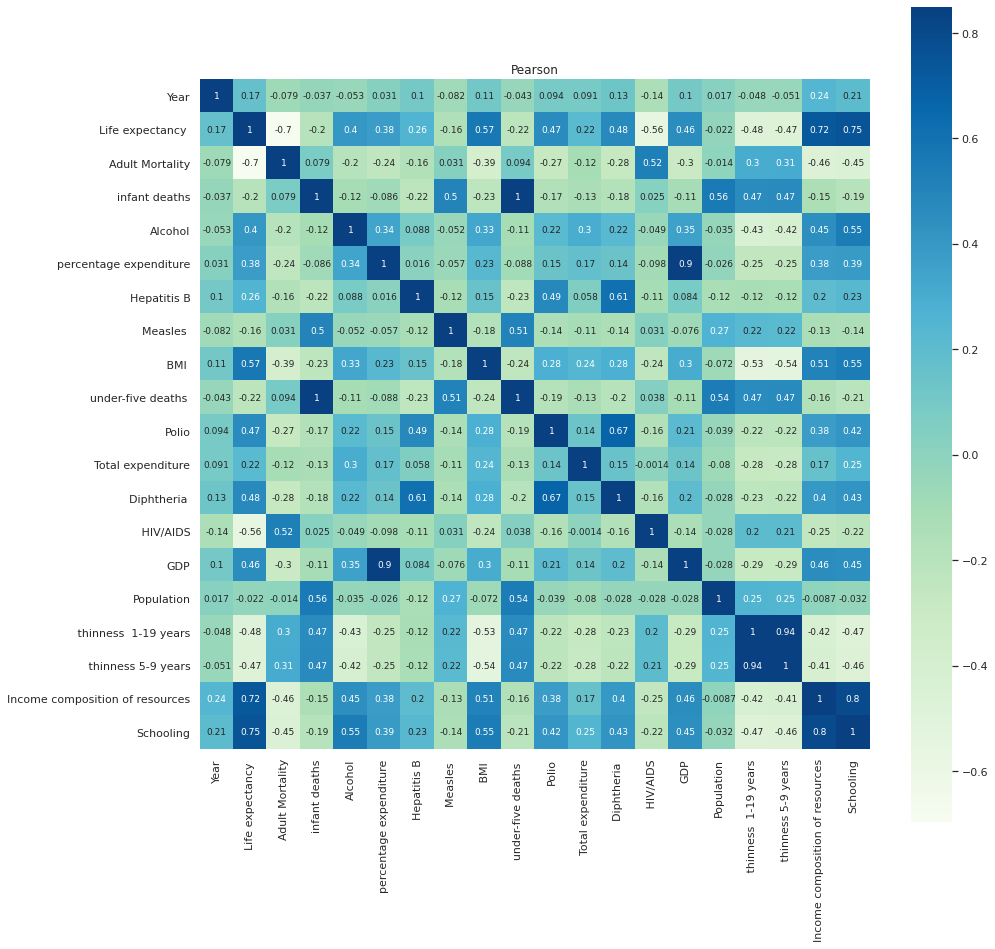

In [8]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(data.corr(),vmax=0.85,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={"size":9})

Al subir una variable D, la variable a predecir tambien aumenta. 

Las variables thinness 5-19 y thinnes 1-19 tienen un comportamiento igual respecto a la variable a predecir. Por otro lado, ambas son variables dependientes, tienen un 0.94.

Lo mismo pasa con GDP y el percentage expenditure, un 0.9.

Lo mismo pasa con under-five deaths y infant deaths, un 1.

Debo de quitar Population porque no me aporta mucho respecto a la expectativa de vida. -0.022. Aunque con 3 variables si que tiene relacion. 

P R E G U N T A S

Mide la influencia mas no la influencia positiva o negativa, eso lo tenemos que interpretar? Diphteria.

La poblacion tiene influencia? que significa ese -0.022?

Qué significan los valores minimos, y los valores negativos?

El año lo tengo que borrar?
Lo que quiero predecir es la expectativa de vida. Pero debe ser respecto a un pais y a un año?? como se deberia de enfocar mi modelo? Es decir, cual es la expectativa de vida en cierto lugar? Pienso que hay que quitar los años y dejar los paises para predecir de acuerdo a algun pais, no? 

Creo que el factor pais es importante debido a que, evidentemente, la predicción variará mucho. India y EEUU por ejemplo. 

Se usan los datos, entonces, de otros paises para por ejemplo calcular la esperanza de vida de España? Deberia de influir entonces? es correcto?

La poblacion es una variable que se marcha porque no me aporta valor.?A


## Arreglo de nombres de columnas para poder borrar algunas

In [9]:
data.rename(columns={" BMI ":"BMI",
                   "Life expectancy ":"Life_Expectancy",
                   "Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths",
                   "percentage expenditure":"Percentage_Expenditure",
                   "Hepatitis B":"HepatitisB",
                  "Measles ":"Measles",
                   " BMI ":"BMI",
                   "under-five deaths ":"Under_Five_Deaths",
                   "Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS",
                   " thinness  1-19 years":"thinness_1to19_years",
                   " thinness 5-9 years":"thinness_5to9_years",
                   "Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Total_Expenditure"},inplace=True)

In [10]:
data_aux = data[data['Infant_Deaths'] < 1001]
data_aux = data[data['Measles'] < 1001]
data_aux = data[data['Under_Five_Deaths'] < 1001]

## Borrando columnas que no aportan valor de analisis

In [11]:
data_aux = data.drop(['thinness_5to9_years', 'Percentage_Expenditure', 'Infant_Deaths', 'Schooling', 'Country', 'Population'], axis=1)

In [12]:
data_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      2938 non-null   int64  
 1   Status                    2938 non-null   object 
 2   Life_Expectancy           2928 non-null   float64
 3   Adult_Mortality           2928 non-null   float64
 4   Alcohol                   2744 non-null   float64
 5   HepatitisB                2385 non-null   float64
 6   Measles                   2938 non-null   int64  
 7   BMI                       2904 non-null   float64
 8   Under_Five_Deaths         2938 non-null   int64  
 9   Polio                     2919 non-null   float64
 10  Total_Expenditure         2712 non-null   float64
 11  Diphtheria                2919 non-null   float64
 12  HIV/AIDS                  2938 non-null   float64
 13  GDP                       2490 non-null   float64
 14  thinness

## Dummies a varaibles categoricas

In [13]:
data_aux = pd.get_dummies(data_aux)

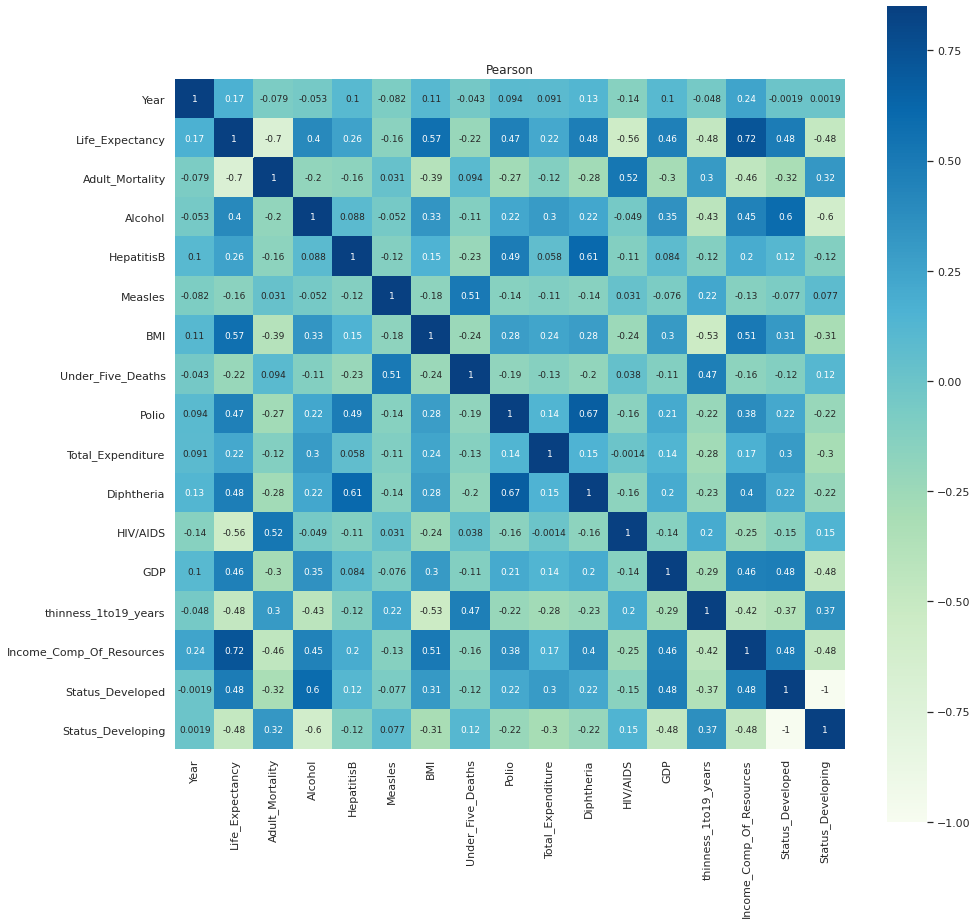

In [14]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(data_aux.corr(),vmax=0.85,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={"size":9})

## Histogramas de variables

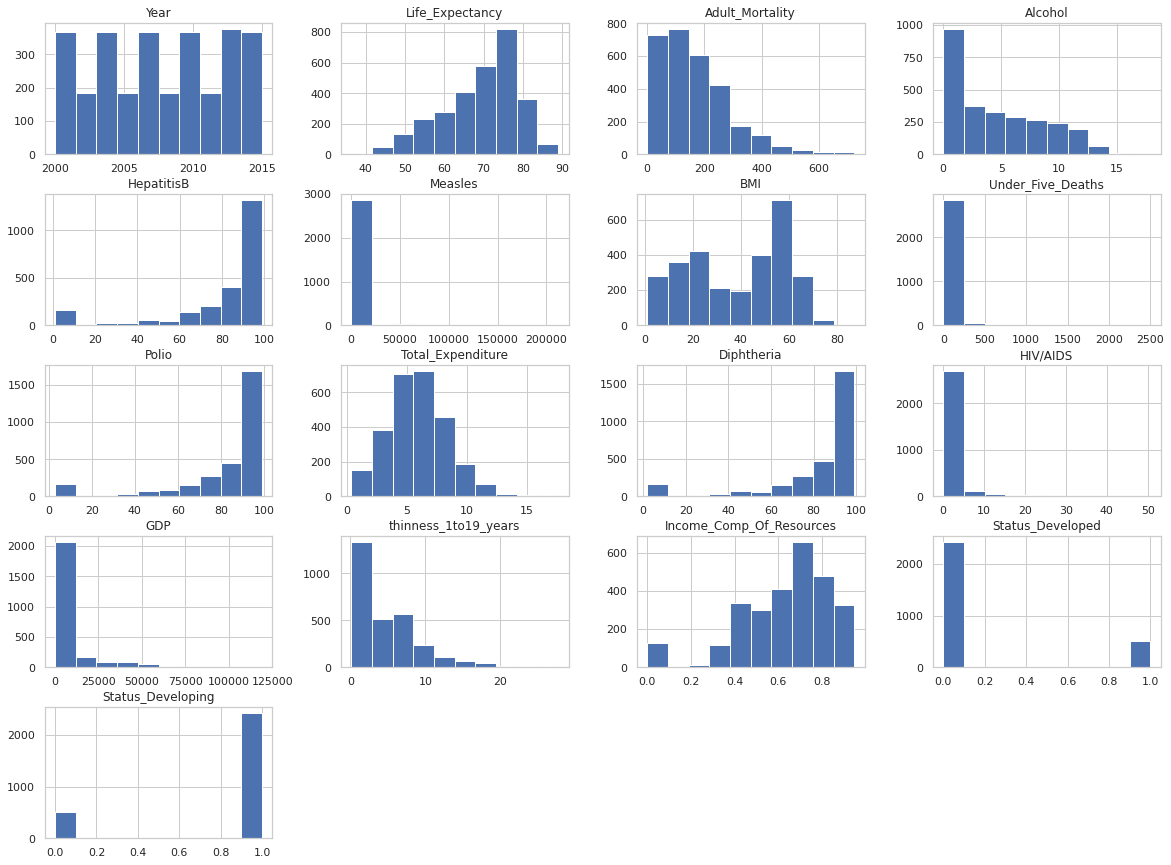

In [15]:
data_aux.hist(figsize = (20,15))
plt.show()

Que distribuciones tengo? Que modelo puedo 

Conclusiones:
Todos estos atributos están en diferentes escalas. Se necesita escalado de características.
Muchos histogramas tienen una gran cola, es decir, se dejan sesgados. Por tanto, debemos convertirlos en una distribución en forma de campana.
La difteria está sesgada a la derecha. Así que necesitamos convertirlo en una distribución en forma de campana.


Adult_mortality A+
Alcohol normal lineal


## Revisión de campos vacios en mi data

In [16]:
data_aux.isnull().sum()

Year                          0
Life_Expectancy              10
Adult_Mortality              10
Alcohol                     194
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Total_Expenditure           226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
thinness_1to19_years         34
Income_Comp_Of_Resources    167
Status_Developed              0
Status_Developing             0
dtype: int64

Debo analizar si debo completar esos datos (promedios o correlacion) o borro esas columnas. 

Un 30% o 40% de nulos es tratable, de otra manera hay que borrar esas columnas. 

In [17]:
data_aux.isnull().sum()*100/data_aux.isnull().count()

Year                         0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Alcohol                      6.603131
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Total_Expenditure            7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
thinness_1to19_years         1.157250
Income_Comp_Of_Resources     5.684139
Status_Developed             0.000000
Status_Developing            0.000000
dtype: float64

Un 30% o 40% de nulos es aceptable por lo que Alcohol, Hepatitis B, Total expenditure, GDP, Population, Income composition of resources y schooling pueden ser procesadas con alguna tecnica de imputacion. 

In [18]:
data_aux["Under_Five_Deaths"] = data_aux["Under_Five_Deaths"].replace(0,np.nan)

In [19]:
data_aux.isna().sum()

Year                          0
Life_Expectancy              10
Adult_Mortality              10
Alcohol                     194
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths           785
Polio                        19
Total_Expenditure           226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
thinness_1to19_years         34
Income_Comp_Of_Resources    167
Status_Developed              0
Status_Developing             0
dtype: int64

Borrar o promediar life expextive

In [20]:
data_aux["Life_Expectancy"] = data_aux["Life_Expectancy"].fillna(value = data_aux["Life_Expectancy"].mean())
data_aux["Adult_Mortality"] = data_aux["Adult_Mortality"].fillna(value = data_aux["Adult_Mortality"].mean())
data_aux.isna().sum()

Year                          0
Life_Expectancy               0
Adult_Mortality               0
Alcohol                     194
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths           785
Polio                        19
Total_Expenditure           226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
thinness_1to19_years         34
Income_Comp_Of_Resources    167
Status_Developed              0
Status_Developing             0
dtype: int64

In [21]:
data_aux

,Year,Life_Expectancy,Adult_Mortality,Alcohol,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1to19_years,Income_Comp_Of_Resources,Status_Developed,Status_Developing
0,2015,65.0,263.0,0.01,65.0,1154,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,0,1
1,2014,59.9,271.0,0.01,62.0,492,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,0,1
2,2013,59.9,268.0,0.01,64.0,430,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,0,1
3,2012,59.5,272.0,0.01,67.0,2787,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,0,1
4,2011,59.2,275.0,0.01,68.0,3013,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,4.36,68.0,31,27.1,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,0.407,0,1
2934,2003,44.5,715.0,4.06,7.0,998,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,0.418,0,1
2935,2002,44.8,73.0,4.43,73.0,304,26.3,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,0.427,0,1
2936,2001,45.3,686.0,1.72,76.0,529,25.9,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,0.427,0,1


In [22]:
imputed_data = []

for year in list(data_aux.Year.unique()):
    year_data = data_aux[data_aux.Year == year].copy()
    
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()

    imputed_data.append(year_data)
data_aux_imputed = pd.concat(imputed_data).copy()

In [23]:
data_aux_imputed.isnull().sum()

Year                        0
Life_Expectancy             0
Adult_Mortality             0
Alcohol                     0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Total_Expenditure           0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
thinness_1to19_years        0
Income_Comp_Of_Resources    0
Status_Developed            0
Status_Developing           0
dtype: int64

In [24]:
data_aux_imputed.head()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1to19_years,Income_Comp_Of_Resources,Status_Developed,Status_Developing
0,2015,65.0,263.0,0.010000,65.0,1154,19.1,83.000000,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,0,1
16,2015,77.8,74.0,4.600000,99.0,0,58.0,44.844961,99.0,6.00,99.0,0.1,3954.227830,1.2,0.762,0,1
32,2015,75.6,19.0,5.288333,95.0,63,59.5,24.000000,95.0,7.08,95.0,0.1,4132.762920,6.0,0.743,0,1
48,2015,52.4,335.0,5.288333,64.0,118,23.3,98.000000,7.0,7.08,64.0,1.9,3695.793748,8.3,0.531,0,1
64,2015,76.4,13.0,5.288333,99.0,0,47.7,44.844961,86.0,7.08,99.0,0.2,13566.954100,3.3,0.784,0,1


In [25]:
data_aux_imputed = data_aux_imputed.drop(['Year'], axis=1)

In [26]:
data_aux_imputed.head()

,Life_Expectancy,Adult_Mortality,Alcohol,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1to19_years,Income_Comp_Of_Resources,Status_Developed,Status_Developing
0,65.0,263.0,0.010000,65.0,1154,19.1,83.000000,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,0,1
16,77.8,74.0,4.600000,99.0,0,58.0,44.844961,99.0,6.00,99.0,0.1,3954.227830,1.2,0.762,0,1
32,75.6,19.0,5.288333,95.0,63,59.5,24.000000,95.0,7.08,95.0,0.1,4132.762920,6.0,0.743,0,1
48,52.4,335.0,5.288333,64.0,118,23.3,98.000000,7.0,7.08,64.0,1.9,3695.793748,8.3,0.531,0,1
64,76.4,13.0,5.288333,99.0,0,47.7,44.844961,86.0,7.08,99.0,0.2,13566.954100,3.3,0.784,0,1


In [27]:
X = data_aux_imputed.drop(['Life_Expectancy'], axis=1)
y = data_aux_imputed['Life_Expectancy']

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 25)
#probar con otra semilla para SVR
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

## Escalado

In [29]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Adult_Mortality           2938 non-null   float64
 1   Alcohol                   2938 non-null   float64
 2   HepatitisB                2938 non-null   float64
 3   Measles                   2938 non-null   int64  
 4   BMI                       2938 non-null   float64
 5   Under_Five_Deaths         2938 non-null   float64
 6   Polio                     2938 non-null   float64
 7   Total_Expenditure         2938 non-null   float64
 8   Diphtheria                2938 non-null   float64
 9   HIV/AIDS                  2938 non-null   float64
 10  GDP                       2938 non-null   float64
 11  thinness_1to19_years      2938 non-null   float64
 12  Income_Comp_Of_Resources  2938 non-null   float64
 13  Status_Developed          2938 non-null   uint8  
 14  Status_D

In [31]:
#simple_imputer = SimpleImputer()
#X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
#X_test = pd.DataFrame(simple_imputer.fit_transform(X_test))

In [32]:
#preparing list to compare all models
Model_Compare = [[]]

# ANN

In [33]:

model = Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mse')


Cuantas mas epocas mayor es la precision. 20, 80. 30, 85. 40, 87

In [34]:
model.fit(x=X_train, y=y_train, validation_data = (X_test, y_test), batch_size=10, epochs=40, verbose=1)

Epoch 1/40
206/206 [==============================] - 1s 2ms/step - loss: 4525.1426 - val_loss: 3861.1443
Epoch 2/40
206/206 [==============================] - 0s 2ms/step - loss: 2480.6621 - val_loss: 1049.3579
Epoch 3/40
206/206 [==============================] - 0s 2ms/step - loss: 540.1100 - val_loss: 287.8497
Epoch 4/40
206/206 [==============================] - 0s 2ms/step - loss: 221.6818 - val_loss: 189.7274
Epoch 5/40
206/206 [==============================] - 0s 2ms/step - loss: 164.1423 - val_loss: 153.1820
Epoch 6/40
206/206 [==============================] - 0s 2ms/step - loss: 135.3808 - val_loss: 128.3228
Epoch 7/40
206/206 [==============================] - 0s 2ms/step - loss: 114.1064 - val_loss: 109.5815
Epoch 8/40
206/206 [==============================] - 0s 2ms/step - loss: 98.2272 - val_loss: 94.7526
Epoch 9/40
206/206 [==============================] - 0s 2ms/step - loss: 85.0768 - val_loss: 82.6514
Epoch 10/40
206/206 [==============================] - 0s 2ms/st

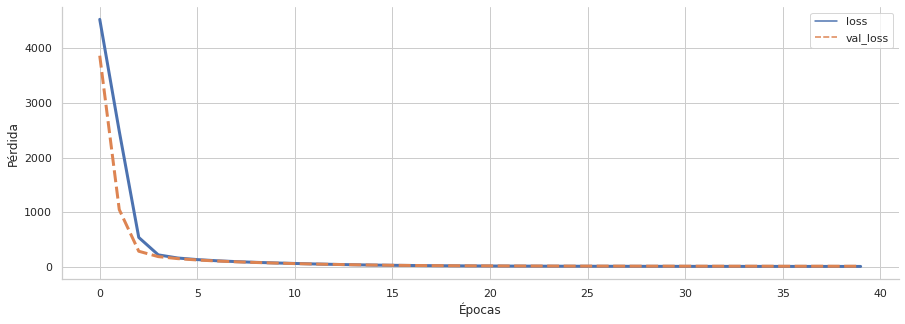

In [35]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
sns.despine()

In [36]:
data['Life_Expectancy'].mean()

69.22493169398912

**Mean absolute error ANN**

In [37]:
prediccion = model.predict(X_test)
meanErrorANN = mean_absolute_error(y_test,prediccion)
print(meanErrorANN)

2.863936540192805


**Error R2Score ANN**

In [38]:
myErrorANN = r2_score(y_train, model.predict(X_train))
print(myErrorANN)

0.8867035697831316


In [39]:
Model_Compare[0] = ['ANN', np.round(meanErrorANN,4), np.round(myErrorANN,4)]

# SVM

In [40]:
svr = SVR(kernel="linear",verbose=True) #[linear, poly, sigmoid, rbf]

In [41]:
svr.fit(X_train,y_train)

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

**Entrenamiento**

In [42]:
svr.score(X_train,y_train)

0.7767610435971968

**Validación** 

In [43]:
svr.score(X_test,y_test)

0.7804365477415073

In [44]:
y_predSVR = svr.predict(X_test)

**Mean absolute error SVR**

In [45]:
meanErrorSVR = mean_absolute_error(y_test,y_predSVR)
print(meanErrorSVR)

3.188886607719713


**Error R2Score SVR**

In [46]:
myErrorSVR = r2_score(y_test, svr.predict(X_test))
print(myErrorSVR)

0.7804365477415073


In [47]:
Model_Compare.append(['SVR', round(meanErrorSVR,4), round(myErrorSVR,4)])

# RL

In [48]:
modelRegr = linear_model.LinearRegression()
modelRegr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred = modelRegr.predict(X_test)

**Mean absolute error Linear Regression**

In [50]:
meanErrorRL = mean_absolute_error(y_test,y_pred)
print(meanErrorRL)

3.342225104667491


**Error R2Score Linear Regression**

In [51]:
 myErrorRegr = r2_score(y_train, modelRegr.predict(X_train))
 print(myErrorRegr)

0.7963435874696163


In [52]:
Model_Compare.append(['RL', round(meanErrorRL,4), round(myErrorRegr,4)])

# RFR

In [53]:
modelRF = RandomForestRegressor(n_estimators=10,random_state=0)
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [54]:
y_pred = modelRF.predict(X_test)

**Error R2Score RandomForestRegressor**

In [55]:
meanErrorRFR = mean_absolute_error(y_test,y_pred)
print(meanErrorRFR)

1.6475964648154342


**Error R2Score RandomForestRegressor**

In [56]:
myErrorRF = r2_score(y_train, modelRF.predict(X_train))

In [57]:
myErrorRF

0.9906390958505487

In [58]:
Model_Compare.append(['RFR', round(meanErrorRFR,4), np.round(myErrorRF,4)])

# Comparación de resultados

In [59]:
Comparision_Table = DataFrame(Model_Compare, columns=['Model','Mean','R2 Score'])
print(Comparision_Table)

  Model    Mean  R2 Score
0   ANN  2.8639    0.8867
1   SVR  3.1889    0.7804
2    RL  3.3422    0.7963
3   RFR  1.6476    0.9906
